

# INVESTIGATING A TMBD DATASET

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Posing questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project involves analyses of a TMBD dataset of large collection of movies. The dataset is from Kaggle. My focus in this project will be to analyse runtime, popularity , revenue , budget trends.


<a id='intro'></a>
## Posing questions

The following questions will be analysed in this project.

<li>What are the distribution and statistics of runtimes, budget ,revenue?</li>

<li>How have the runtimes, budgets, revenues of movies varied over time? </li>

<li>How is budget related with popularity? </li>

<li>How does the number of movie releases vary with month? </li>

<li>How does revenue vary with month?</li>

<li>What are the yearwise movies topping in popularity , budget , revenue respectively? </li>



In [732]:
#import necessary packages


import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from pylab import xticks

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, I would like to keep the data that are relavant to my inestigation. All unnecessary data will be discarded.
Rows with null objects, values '0', duplicated will also be dropped.

### General Properties

In [733]:
#store the data into a variable
data = pd.read_csv('tmdb-movies.csv')

#display info about data
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [734]:
#identify duplicates
sum(data.duplicated())

1

In [735]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<li>As observed above, there several unnecessary data which needs to be removed for faster processing.</li>
<li>There is 1 duplicate</li>
<li>There are several cells with 0 value </li>


### Data Cleaning

In this section, the following steps are carried out

<li>Unwanted columns like ids, homepage , taglines etc., will be removed</li>
<li>Duplicate data will be dropped</li>
<li>Cells with 0 values in runtime, budget , revenue will be dropped.</li>

In [736]:
#list of unnecessary data
unwanted = [ 'id', 'imdb_id', 'homepage', 'keywords','tagline', 'overview', 'production_companies', 'budget_adj', 'revenue_adj', 'vote_count', 'vote_average']

#dropping unnecessary data
data = data.drop(unwanted, 1)

#dropping duplicates
data.drop_duplicates(keep = 'first', inplace = True)

#fitering columns
filter_null=['budget', 'revenue','runtime']

#Replacing 0 with NaN
data[filter_null] = data[filter_null].replace(0, py.NaN) 

#Dropping NaN objects
data.dropna(subset = filter_null, inplace = True)

#Display data
data.head()


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,4/1/15,2015


In [737]:
#Drop null objects
data.dropna(subset=['genres','budget','revenue','runtime'], inplace=True)  
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null float64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 331.2+ KB


In [738]:
#display null data
data.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              4
director          1
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

As observed from the information above, columns of my interest for analyses have no null objects.

<a id='eda'></a>
## Exploratory Data Analysis


The following functions will be helpful to plot the required data.

In [753]:
#Function plots histogram accepting column name, range , step
def create_hist (col_name,start,stop,step):
    #set bins
    bins=py.arange(start,stop,step)
    #plot histogram for column name
    plt.hist(data[col_name],bins)
    #plot labels, titles
    plt.xlabel(col_name)
    plt.title('Distribution of ' + col_name )
    #show plot
    plt.show()
    
#funtion prints statistics for column name
def col_info(col_name):
       print (data[col_name].describe())

#funtion creates box plot for column name
def create_boxplot (col_name):
    #create boxplot for the column
    sns.boxplot(data[col_name])
    #show plot
    plt.show()

#function creates line_chart for variation of the column name over the years
def line_chart(col_name,y_label):
    #group data by release year
    col_name = data.groupby('release_year')[col_name].sum()
    #plot labels, titles
    plt.xlabel('Year')
    plt.ylabel(y_label)
    plt.title('year of release vs ' + y_label )
    #create plot
    plt.plot(col_name)
    #show plot
    plt.show()

#function to print movie topping in a specific index
def max_movie(col_name):
    #identify row with max value
    max_value =data.loc[data[col_name].idxmax()]
    #create data frame
    max_data = pd.DataFrame(max_value[['release_year','original_title',col_name]])
    print ("Movie topping in " +col_name,max_data.head())




    

#### QUESTION 1: What are the distribution and statistics of runtime , budget , revenue, profit?

We use the above functions for our analyses

### Runtime analysis

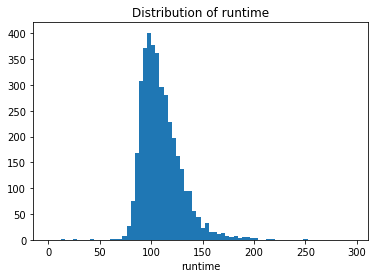

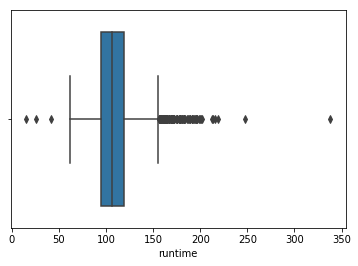

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64
Movie topping in runtime                   2107
release_year      2010
original_title  Carlos
runtime            338


In [754]:
#calling functions for plotting histogram, boxplot, producing statistical data, identify movie with max value

create_hist ('runtime',0,300,4)

create_boxplot('runtime')

col_info('runtime')

max_movie('runtime')



The above plots and the report shows the follwing data about runtime
<li> The **average runtime** is **109 minutes** </li>
<li> Most of the movies have runtimes betwen **106 to 119 minutes** </li>
<li> The movie longest run time in the dataset is identified as **Carlos** with a runtime of **338 minutess** </li>

### Budget analysis

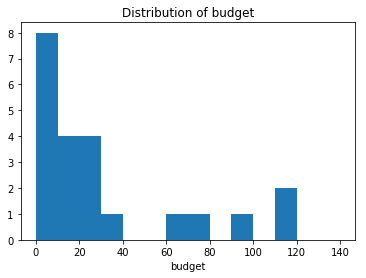

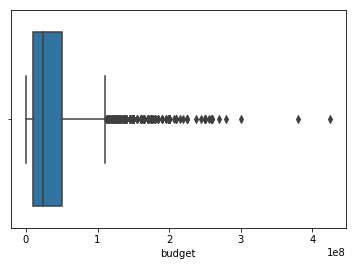

count    3.854000e+03
mean     3.720370e+07
std      4.220822e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64
Movie topping in budget                              2244
release_year                 2010
original_title  The Warrior's Way
budget                   4.25e+08


In [755]:
#calling functions for plotting histogram, boxplot, producing statistical data, identify movie with max value

create_hist ('budget',0,150,10)

create_boxplot('budget')

col_info('budget')

max_movie('budget')

The above plots and the report shows the follwing data about runtime
<li> The **average budget** is ** USD 37million **  </li> 
<li> Most of the movies have budgets between **USD 24 to 50 million** </li>
<li> The movie with highest budget in the dataset is identified as **The Warrior's Way** with a budget of **USD 425 million** </li>

### Revenue analysis

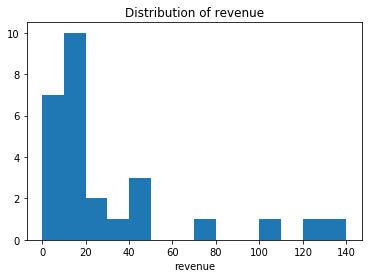

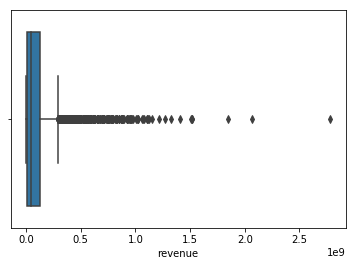

count    3.854000e+03
mean     1.076866e+08
std      1.765393e+08
min      2.000000e+00
25%      1.360003e+07
50%      4.480000e+07
75%      1.242125e+08
max      2.781506e+09
Name: revenue, dtype: float64
Movie topping in revenue                        1386
release_year           2009
original_title       Avatar
revenue         2.78151e+09


In [756]:
#calling functions for plotting histogram, boxplot, producing statistical data, identify movie with max value
create_hist ('revenue',0,150,10)

create_boxplot('revenue')

col_info('revenue')

max_movie('revenue')

The above plots and the report shows the follwing data about runtime
<li> The **average revenue** is ** USD 107million **  </li> 
<li> Most of the movies have revenues between **USD 45 to 124 million** </li>
<li> The movie with highest revenue in the dataset is identified as **Avatar** with a revenue of **USD 2.7 billion** </li>

### Question 2 : How have the runtimes, budgets, revenues of movies varied over time?

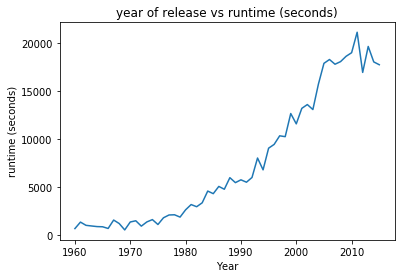

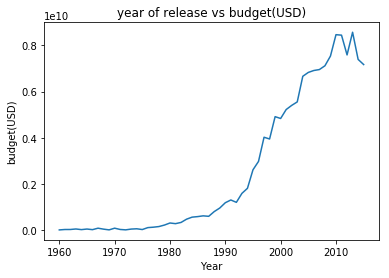

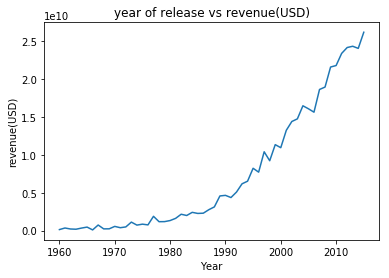

In [757]:
#calling functions for printing line charts
line_chart('runtime','runtime (seconds)')

line_chart('budget','budget(USD)')

line_chart('revenue','revenue(USD)')


<li> Runtimes, budgets, revenue have increased massively overtime </li> 
<li> From the plots, I am able to observe that all runtimes, revenues, budgets together have **quadrupled** over the past 15 years </li>
<li> Runtimes, budgets seem to have hit the **saturation** over late 2000s </li> 

### Question 3 : How is budget related to popularity?

The question that pops in my mind is are all high budget films always popular?

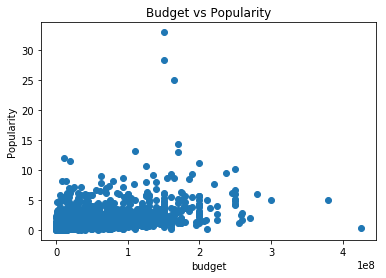

In [758]:
#create scatter plot
plt.scatter(data['budget'], data['popularity'])
#labels, titles
plt.xlabel('budget')
plt.ylabel('Popularity')
plt.title('Budget vs Popularity');

The scatter plot above shows that a high budget doesn't guarantee high popularity as majority of the high budget films lie at the same popularity level as low budget films

### Question 4: How does the number of movie releases vary with month?

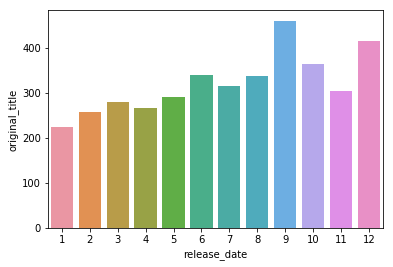

,original_title
release_date,
1,225
2,257
3,279
4,267
5,291
6,340
7,316
8,337
9,460


In [759]:
#convert argument to datetime
data.release_date = pd.to_datetime(data['release_date'])
#setting release date as index
rel_date = data.set_index('release_date')
#grouping by release month
rel_month = rel_date.groupby([(rel_date.index.month)])
#count total movies per month
movie_month = rel_month.original_title.count()
#convert to dataframe
monthly_movies= pd.DataFrame(movie_month)
#create plot
sns.barplot(x = monthly_movies.index, y = monthly_movies.original_title, data = monthly_movies)
#show plot
plt.show()
#show data
monthly_movies.head(12)

The number of movies released per month are kind of equally distributed except for the peaks observed at **September** and **December**. The for these peaks is possibly the holiday and festive seasons

### Question 5 : How does revenue vary with month?


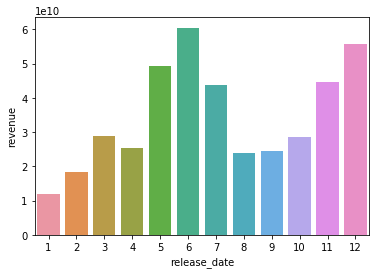

,revenue
release_date,
1,1.201999e+10
2,1.833736e+10
3,2.890154e+10
4,2.526240e+10
5,4.938885e+10
6,6.043814e+10
7,4.369207e+10
8,2.383855e+10
9,2.439324e+10


In [760]:
#summing up revenue for each month
monthly_revenue = rel_month.revenue.sum()

#converting to dataframe
monthly_revenue = pd.DataFrame(monthly_revenue)

#create barplot
sns.barplot(x = monthly_revenue.index, y = monthly_revenue.revenue, data = monthly_revenue)

plt.show()

monthly_revenue.head(12)

From the plot and data above, it is clear that huge revenue is generated in the months of **June** and **Decemeber**. These months have the theatres packed and tickets sold out for most of the movies it is festive and holiday season.

### Question 6: What are the yearwise movies topping in popularity , budget , revenue respectively? 

In [761]:
#fuction accepts the column name and prints yearwise best film for the same
def yearwise_max (col_name):
    
    #grouping data by month and identifying respective row
    yearmax=data.loc[data.groupby('release_year')[col_name].idxmax()]
   
    #dataframe created for specific columns
    yearmax_data=pd.DataFrame(re[['release_year','original_title',col_name]])
    
    return (yearmax_data.head(100))
    
    

#### Yearwise chart for the most popular movie

In [762]:
yearwise_max('popularity')

,release_year,original_title,popularity
10143,1960,Spartacus,1.136943
10112,1961,West Side Story,0.900245
9850,1962,Lawrence of Arabia,1.168767
10443,1963,Cleopatra,0.804533
9887,1964,My Fair Lady,0.633882
10716,1965,The Greatest Story Ever Told,0.146033
10835,1966,The Sand Pebbles,0.299911
10409,1967,The Dirty Dozen,0.485288
9719,1968,2001: A Space Odyssey,3.309196
10724,1969,On Her Majesty's Secret Service,1.778746


### Yearwise chart for the movie with highest budget

In [763]:
yearwise_max('budget')

,release_year,original_title,budget
10143,1960,Spartacus,12000000.0
10112,1961,West Side Story,6000000.0
9850,1962,Lawrence of Arabia,15000000.0
10443,1963,Cleopatra,31115000.0
9887,1964,My Fair Lady,17000000.0
10716,1965,The Greatest Story Ever Told,20000000.0
10835,1966,The Sand Pebbles,12000000.0
10409,1967,The Dirty Dozen,25000000.0
9719,1968,2001: A Space Odyssey,12000000.0
10724,1969,On Her Majesty's Secret Service,7000000.0


### Yearwise chart for the movie with highest revenue

In [764]:
yearwise_max('revenue')

,release_year,original_title,revenue
10143,1960,Spartacus,6.000000e+07
10112,1961,West Side Story,4.365682e+07
9850,1962,Lawrence of Arabia,7.000000e+07
10443,1963,Cleopatra,5.775000e+07
9887,1964,My Fair Lady,7.200000e+07
10716,1965,The Greatest Story Ever Told,1.200000e+07
10835,1966,The Sand Pebbles,2.000000e+07
10409,1967,The Dirty Dozen,4.530000e+07
9719,1968,2001: A Space Odyssey,5.671537e+07
10724,1969,On Her Majesty's Secret Service,8.197449e+07


<a id='conclusions'></a>
## Conclusions

From the analyses done above, we are able to observe how things in the entertainment industry has drastically changed, especially over the past 10 years. We are able to see the steep rise in runtimes, budgets, revenues. These clearly show the advancement of the entertainment industry.

#### Limitations of the dataset:
<li>Presence of null data</li>
<li>A lot of values were unavailable and were '0' in case of revenue, budgets </li>
<li>Presence of outliers which affects mean of values</li>